In [0]:
import numpy as np,datetime
import pandas as pd
import sklearn,tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

data_path = "/content/natural_images"
kaggle_path = "/content/drive/My\ Drive/Colab\ Notebooks/"
!mkdir ~/.kaggle
!cp $kaggle_path/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 
# !kaggle datasets download -d prasunroy/natural-images
# !unzip natural-images.zip
# rm -r data

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
from keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(validation_split=0.2,rescale=1./255)

train_data  = data_gen.flow_from_directory(data_path,target_size=(128,128),class_mode='categorical', batch_size=32, 
                                           shuffle=True, subset='training' , color_mode='grayscale')
test_data  = data_gen.flow_from_directory(data_path,target_size=(128,128),class_mode='categorical', 
                                          shuffle=True, subset='validation' , color_mode='grayscale')

print (test_data.labels)
print (train_data.batch_size)

Using TensorFlow backend.


Found 5522 images belonging to 8 classes.
Found 1377 images belonging to 8 classes.
[0 0 0 ... 7 7 7]
32


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint,TensorBoard
input_shape = (128,128,1)
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128,128,1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
keras_callbacks   = [
      EarlyStopping(monitor='val_acc', patience=1, mode='max', min_delta=0.0001),
      ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/Lab2_3/best_model.h5', monitor='val_acc', save_best_only=True, mode='max')
]
model.fit(train_data, validation_data=(test_data), epochs=5, verbose = 1,shuffle=True,callbacks=keras_callbacks)

Epoch 1/5
173/173 [==============================] - 31s 177ms/step - loss: 1.3767 - acc: 0.7180 - val_loss: 1.4536 - val_acc: 0.8214
Epoch 2/5
173/173 [==============================] - 28s 163ms/step - loss: 0.1793 - acc: 0.9388 - val_loss: 0.0022 - val_acc: 0.8489
Epoch 3/5
173/173 [==============================] - 28s 163ms/step - loss: 0.0404 - acc: 0.9886 - val_loss: 0.4063 - val_acc: 0.8569
Epoch 4/5
173/173 [==============================] - 29s 165ms/step - loss: 0.0081 - acc: 0.9986 - val_loss: 0.1280 - val_acc: 0.8482


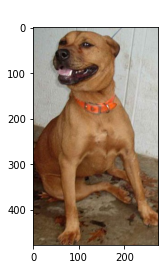

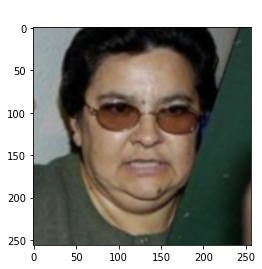

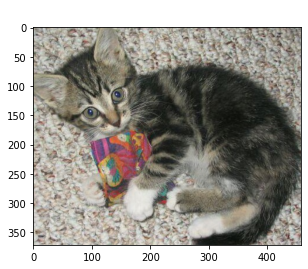

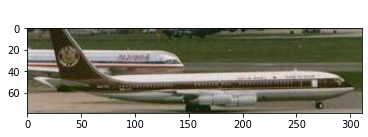

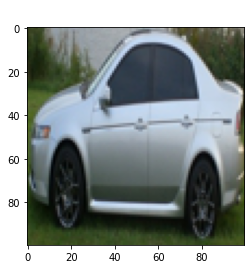

In [0]:
import matplotlib.pyplot as plt, random
from PIL import Image

def predict(filename):
  a = np.array(Image.open(filename).convert('L').resize((128,128)),dtype=float)
  
  a/=255
  a = a.reshape((128,128,1))
  a = model.predict_classes(np.expand_dims(a,axis=0))
  classes = {v: k for k, v in train_data.class_indices.items()}
  # print (classes[a[0]])
  plt.imshow(Image.open(filename))
  plt.title(classes[a[0]],fontdict={'fontsize':'20','color':'white'})
  plt.show()

for i in random.choices(test_data.filepaths,k=5):
  predict(i)


